In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:


def fourDEnVar(f,x_b,B,R,Obs,n,gamma=1,m_obs=2):
    np.random.seed(20)
    print(gamma)
    R_inv=np.linalg.inv(R)
    Ens=np.random.multivariate_normal(x_b,B,n).T
    Xb=(Ens-x_b.reshape(2,1))/np.sqrt(n-1)
    HEns=np.ones([m_obs,n])
    HXb=np.ones([m_obs,n])
    w=np.zeros([n])
    for i,xi in enumerate(Ens.T):
        HEns.T[i]=f(xi)
        HXb.T[i]=(f(xi)-f(x_b))/np.sqrt(n-1)

    deltay=Obs-f(x_b)
    mismatch=(np.dot(HXb,w)+deltay).reshape([m_obs,1])
    Jo=np.dot(np.dot(mismatch.T,R_inv),mismatch)
    Jb=np.dot(w.T,w)
    J=0.5*Jo+0.5*Jb
    # print(f'Prior J={float(J)}')

    w_opt=np.dot(np.linalg.inv(gamma*np.eye(n)+np.dot(np.dot(HXb.T,R_inv),HXb)),np.dot(HXb.T,np.dot(R_inv,deltay)))

    deltay=f(x_b)-Obs
    mismatch=(np.dot(HXb,w_opt)+deltay).reshape([m_obs,1])
    Jo=np.dot(np.dot(mismatch.T,R_inv),mismatch)
    Jb=np.dot(w_opt.T,w_opt)
    J=0.5*Jo+0.5*Jb
    # print(f'Post J={float(J)}')
    x_a=x_b+np.dot(Xb,w_opt)
    if 0:
        wa=np.linalg.cholesky(np.linalg.pinv(gamma*np.eye(n)+np.dot(np.dot(HXb.T,R_inv),HXb)))

        Xa=np.dot(Xb,wa)
        B_post=np.dot(Xa,Xa.T)
        return x_a,B_post,J,Xb,HXb
    
    return x_a,w_opt,J,Ens,HEns,Xb,HXb

In [20]:
def f1(x):
    t=np.arange(50)
    t=np.array([0,10])
    return x[0]*t+x[1]



def f2(x):
    t=np.arange(50)
    t=np.array([0,10])
    return x[0]**2*t/2+np.exp(0.5*x[1])

In [21]:

m_obs=2
erro=0.2
true=np.array([5,5])
np.random.seed(42)
R=np.diag(np.ones(m_obs)*erro**2)
Obs_f1=f1(true)+np.random.normal(0,erro,m_obs)
Obs_f2=f2(true)+np.random.normal(0,erro,m_obs)
x_b=np.array([4,3])
n=4
param_error=np.array([0.5,1])
B=np.diag(np.ones(2)*param_error**2)

x_a_f1,w_opt_f1,J_f1,Ens_f1,HEns_f1,Xb_f1,HXb_f1=fourDEnVar(f1,x_b,B,R,Obs_f1,n,m_obs=m_obs)
x_a_f2,w_opt_f2,J_f2,Ens_f2,HEns_f2,Xb_f2,HXb_f2=fourDEnVar(f2,x_b,B,R,Obs_f2,n,m_obs=m_obs)

erro=f2(true)-f2(true)
Obs_f2_err=f2(true)
R=np.diag(np.ones(m_obs)*erro**2)



1
1


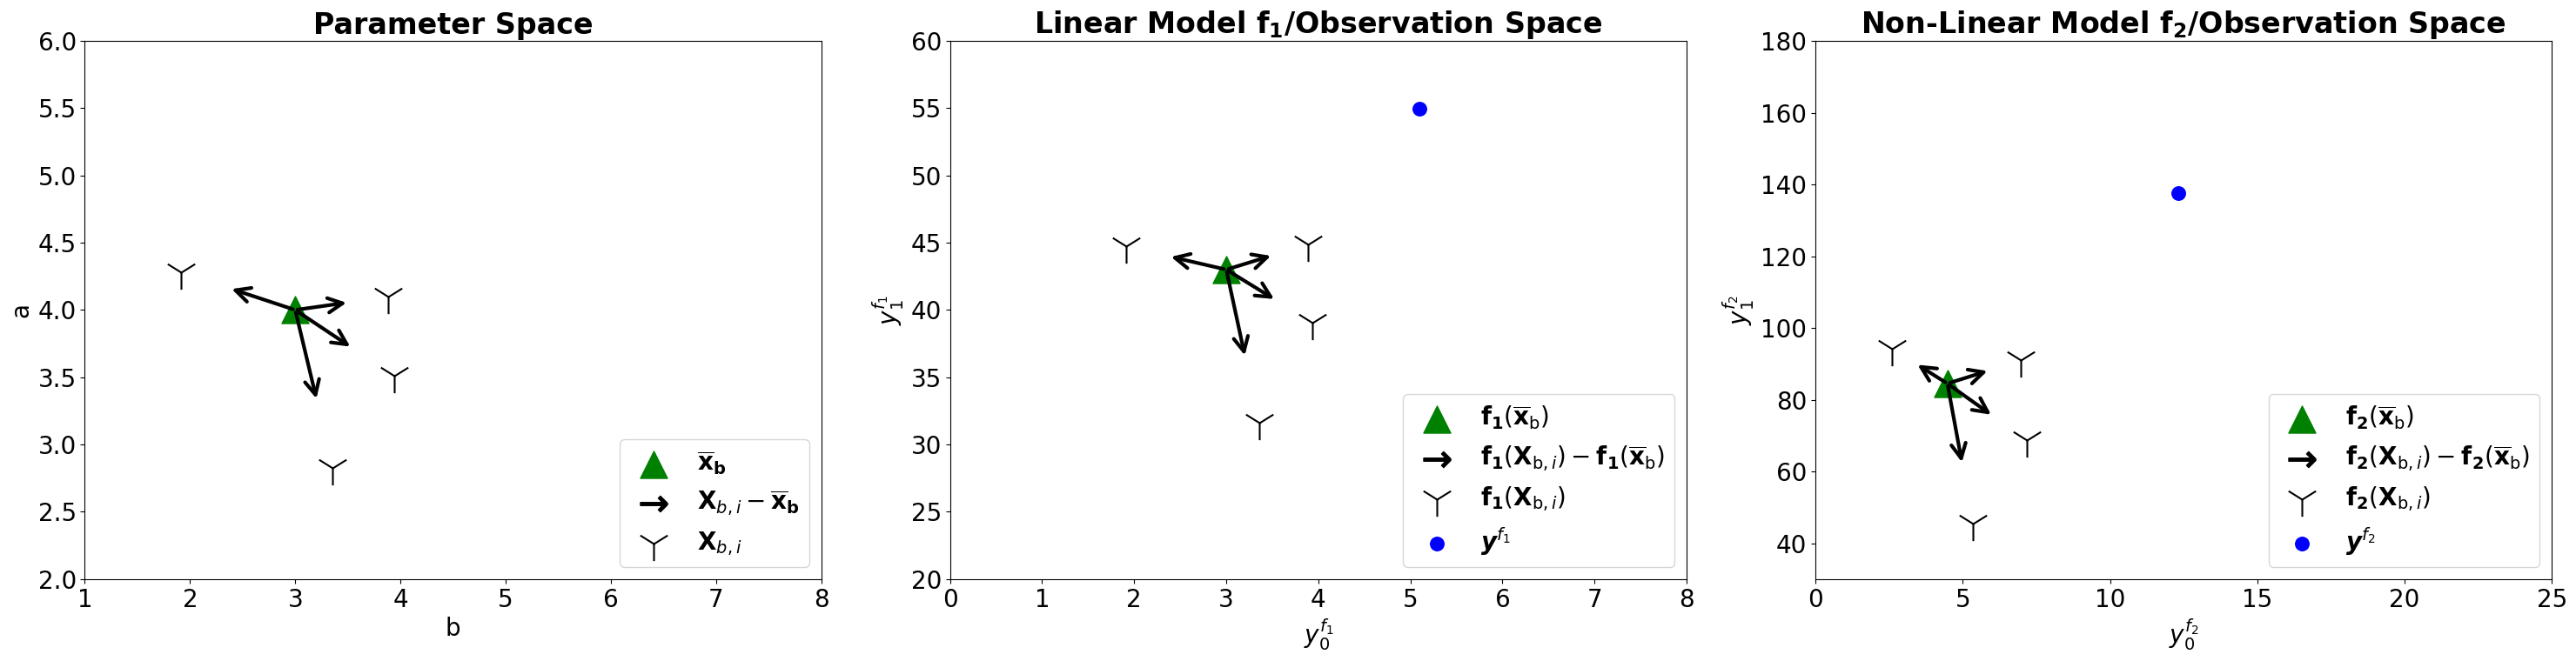

In [37]:
plt.rcParams.update({'font.size': 20})

fig, ax, = plt.subplots(nrows=1, ncols=3,sharex=False,figsize=(30,8))
ax=ax.flatten()

######## PARAM ############


pr=ax[0].scatter(x_b[1],x_b[0],c='green',marker=r'^',s=500,label=r'$\overline{\bf x}_{b}$')

ar=ax[0].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500, label=r'${\bf X}_{b,i} - \overline{\bf x}_{b}$' )

for i in range(n):
    en=ax[0].scatter(Ens_f2.T[i,1],Ens_f2.T[i,0],marker='1',s=800,color='black',label=r'${\bf X}_{b,i}$')
    ax[0].annotate("", xytext=(x_b[1], x_b[0]), xy=((x_b+Xb_f2.T)[i,1],(x_b+Xb_f2.T)[i,0]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))
ax[0].set_xlim(1,8)
ax[0].set_ylim(2,6)
ax[0].set_xlabel('b')
ax[0].set_ylabel('a')
ax[0].set_title('Parameter Space',fontweight='bold')
ax[0].legend(handles=[pr,ar,en],loc=4)


######## F1 ############
y=ax[1].scatter(Obs_f1[0],Obs_f1[-1],c='blue',marker=r'.',s=500,label=r'$\boldsymbol{y}^{f_1}$')

pr=ax[1].scatter(f1(x_b)[0],f1(x_b)[-1],c='green',marker=r'^',s=500,label=r'${\bf f_1}\left(\overline{\bf x}_{\mathrm{b}}\right)$')
ar=ax[1].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500,  label=r'${\bf f_1}\left({\bf X}_{\mathrm{b},i}\right) - {\bf f_1}\left(\overline{\bf x}_{\mathrm{b}}\right)$' )

for i in range(n):
    en=ax[1].scatter(HEns_f1.T[i,0],HEns_f1.T[i,-1],marker='1',s=800,color='black',label=r'${\bf f_1}\left({\bf X}_{\mathrm{b},i}\right)$')
    ax[1].annotate("", xytext=(f1(x_b)[0], f1(x_b)[1]), xy=((f1(x_b)+HXb_f1.T)[i,0],(f1(x_b)+HXb_f1.T)[i,1]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))

ax[1].set_ylim(20,60)
ax[1].set_xlim(0,8)

ax[1].set_xlabel(r'$y^{f_1}_{0}$',fontweight='bold')
ax[1].set_ylabel(r'$y^{f_1}_{1}$',fontweight='bold')
ax[1].set_title(r'Linear Model f$_{\bf 1}$/Observation Space',fontweight='bold')
ax[1].legend(handles=[pr,ar,en,y],loc=4)


######## F2 ############
y=ax[2].scatter(Obs_f2[0],Obs_f2[-1],c='blue',marker=r'.',s=500,label=r'$\boldsymbol{y}^{f_2}$')
pr=ax[2].scatter(f2(x_b)[0],f2(x_b)[-1],c='green',marker=r'^',s=500,label=r'${\bf f_2}\left(\overline{\bf x}_{\mathrm{b}}\right)$')
ar=ax[2].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500,  label=r'${\bf f_2}\left({\bf X}_{\mathrm{b},i}\right) - {\bf f_2}\left(\overline{\bf x}_{\mathrm{b}}\right)$' )

for i in range(n):
    en=ax[2].scatter(HEns_f2.T[i,0],HEns_f2.T[i,-1],marker='1',s=800,color='black',label=r'${\bf f_2}\left({\bf X}_{\mathrm{b},i}\right)$')
    ax[2].annotate("", xytext=(f2(x_b)[0], f2(x_b)[1]), xy=((f2(x_b)+HXb_f2.T)[i,0],(f2(x_b)+HXb_f2.T)[i,1]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))

ax[2].set_ylim(30,180)
ax[2].set_xlim(0,25)
ax[2].set_xlabel(r'$y^{f_2}_{0}$',fontweight='bold')
ax[2].set_ylabel(r'$y^{f_2}_{1}$',fontweight='bold')
ax[2].set_title(r'Non-Linear Model f$_{\bf 2}$/Observation Space',fontweight='bold')

ax[2].legend(handles=[pr,ar,en,y],loc=4)

plt.tight_layout()
plt.savefig('Vis1.pdf')
plt.savefig('Vis1.png')

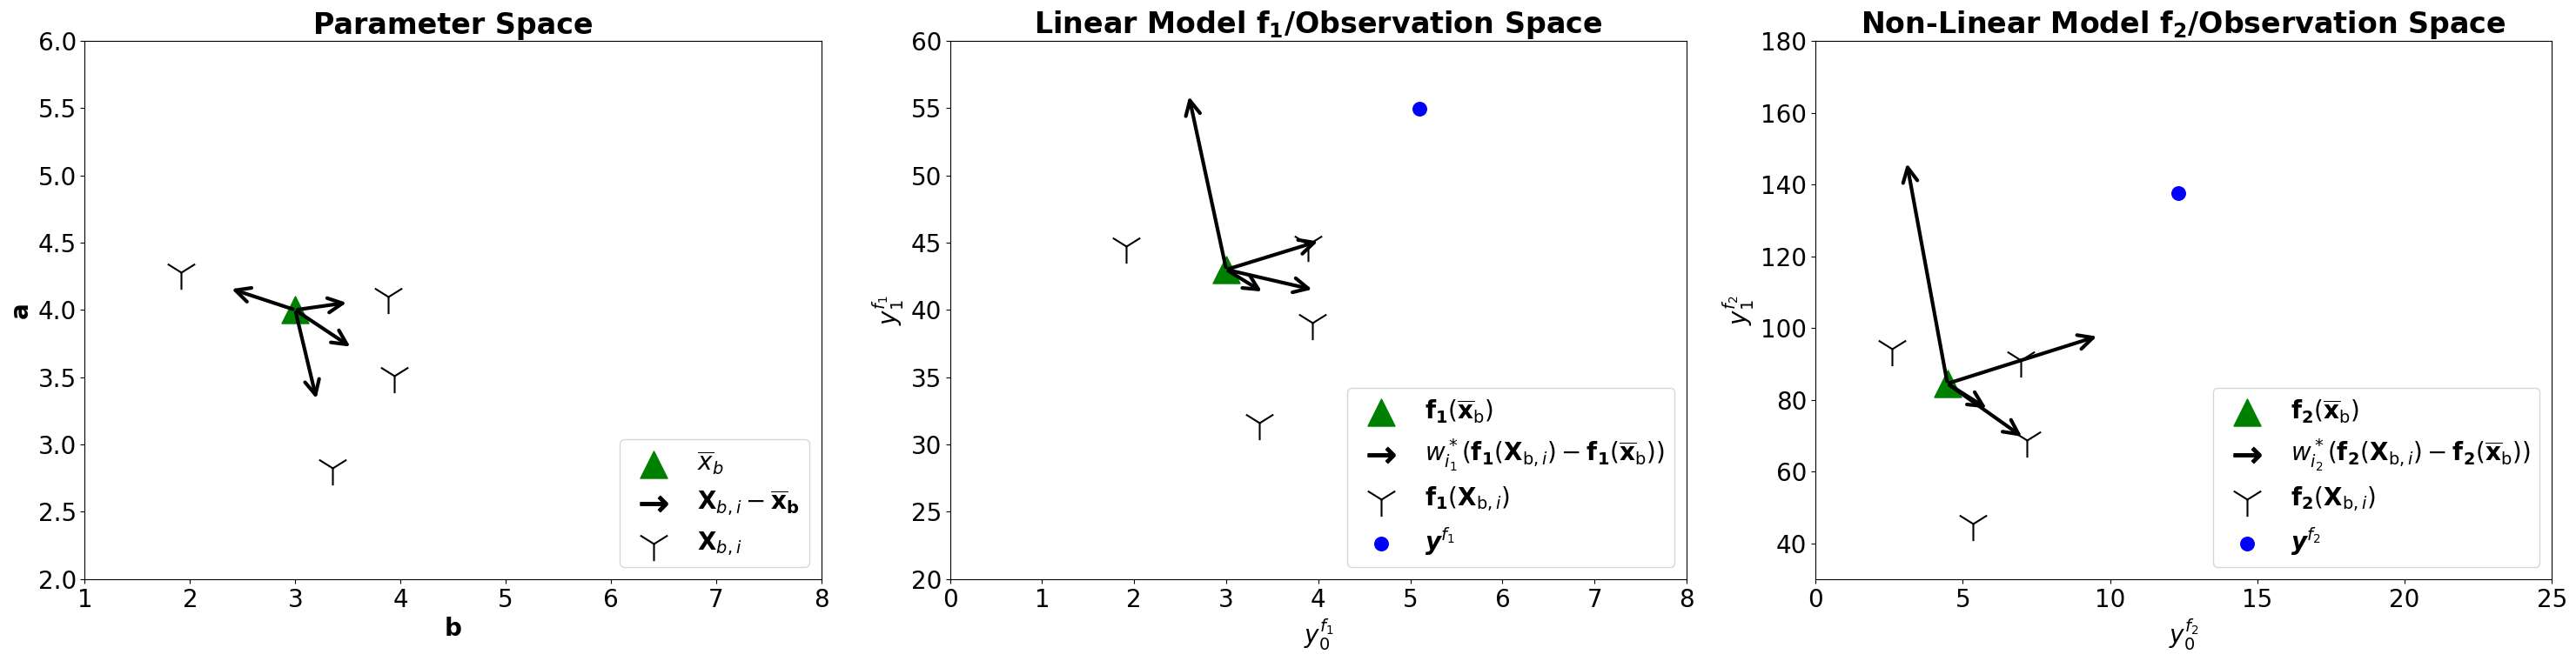

In [38]:

fig, ax, = plt.subplots(nrows=1, ncols=3,sharex=False,figsize=(30,8))
ax=ax.flatten()

######## PARAM ############


pr=ax[0].scatter(x_b[1],x_b[0],c='green',marker=r'^',s=500,label=r'$\overline{x}_{b}$')
ar=ax[0].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500, label=r'${\bf X}_{b,i} - \overline{\bf x}_{b}$' )

for i in range(n):
    en=ax[0].scatter(Ens_f2.T[i,1],Ens_f2.T[i,0],marker='1',s=800,color='black',label=r'${\bf X}_{b,i}$')
    ax[0].annotate("", xytext=(x_b[1], x_b[0]), xy=((x_b+Xb_f2.T)[i,1],(x_b+Xb_f2.T)[i,0]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))
ax[0].set_xlim(1,8)
ax[0].set_ylim(2,6)
ax[0].set_xlabel('b',fontweight='bold')
ax[0].set_ylabel('a',fontweight='bold')
ax[0].set_title('Parameter Space',fontweight='bold')
ax[0].legend(handles=[pr,ar,en],loc=4)


######## F1 ############
y=ax[1].scatter(Obs_f1[0],Obs_f1[-1],c='blue',marker=r'.',s=500,label=r'$\boldsymbol{y}^{f_1}$')

pr=ax[1].scatter(f1(x_b)[0],f1(x_b)[-1],c='green',marker=r'^',s=500,label=r'${\bf f_1}\left(\overline{\bf x}_{\mathrm{b}}\right)$')
ar=ax[1].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500,  label=r'$w_{i_1}^*$(${\bf f_1}\left({\bf X}_{\mathrm{b},i}\right) - {\bf f_1}\left(\overline{\bf x}_{\mathrm{b}}\right)$)' )

for i in range(n):
    en=ax[1].scatter(HEns_f1.T[i,0],HEns_f1.T[i,-1],marker='1',s=800,color='black',label=r'${\bf f_1}\left({\bf X}_{\mathrm{b},i}\right)$')
    ax[1].annotate("", xytext=(f1(x_b)[0], f1(x_b)[1]), xy=((f1(x_b)+w_opt_f1[i]*HXb_f1.T)[i,0],(f1(x_b)+w_opt_f1[i]*HXb_f1.T)[i,1]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))

ax[1].set_ylim(20,60)
ax[1].set_xlim(0,8)

ax[1].set_xlabel(r'$y^{f_1}_{0}$',fontweight='bold')
ax[1].set_ylabel(r'$y^{f_1}_{1}$',fontweight='bold')
ax[1].set_title(r'Linear Model f$_{\bf 1}$/Observation Space',fontweight='bold')
ax[1].legend(handles=[pr,ar,en,y],loc=4)


######## F2 ############
y=ax[2].scatter(Obs_f2[0],Obs_f2[-1],c='blue',marker=r'.',s=500,label=r'$\boldsymbol{y}^{f_2}$')
pr=ax[2].scatter(f2(x_b)[0],f2(x_b)[-1],c='green',marker=r'^',s=500,label=r'${\bf f_2}\left(\overline{\bf x}_{\mathrm{b}}\right)$')
ar=ax[2].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500,  label=r'$w_{i_2}^*$(${\bf f_2}\left({\bf X}_{\mathrm{b},i}\right) - {\bf f_2}\left(\overline{\bf x}_{\mathrm{b}}\right)$)' )

for i in range(n):
    en=ax[2].scatter(HEns_f2.T[i,0],HEns_f2.T[i,-1],marker='1',s=800,color='black',label=r'${\bf f_2}\left({\bf X}_{\mathrm{b},i}\right)$')
    ax[2].annotate("", xytext=(f2(x_b)[0], f2(x_b)[1]), xy=((f2(x_b)+w_opt_f2[i]*HXb_f2.T)[i,0],(f2(x_b)+w_opt_f2[i]*HXb_f2.T)[i,1]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))

ax[2].set_ylim(30,180)
ax[2].set_xlim(0,25)
ax[2].set_xlabel(r'$y^{f_2}_{0}$',fontweight='bold')
ax[2].set_ylabel(r'$y^{f_2}_{1}$',fontweight='bold')
ax[2].set_title(r'Non-Linear Model f$_{\bf 2}$/Observation Space',fontweight='bold')

ax[2].legend(handles=[pr,ar,en,y],loc=4)

plt.tight_layout()
plt.savefig('Vis2.pdf')
plt.savefig('Vis2.png')

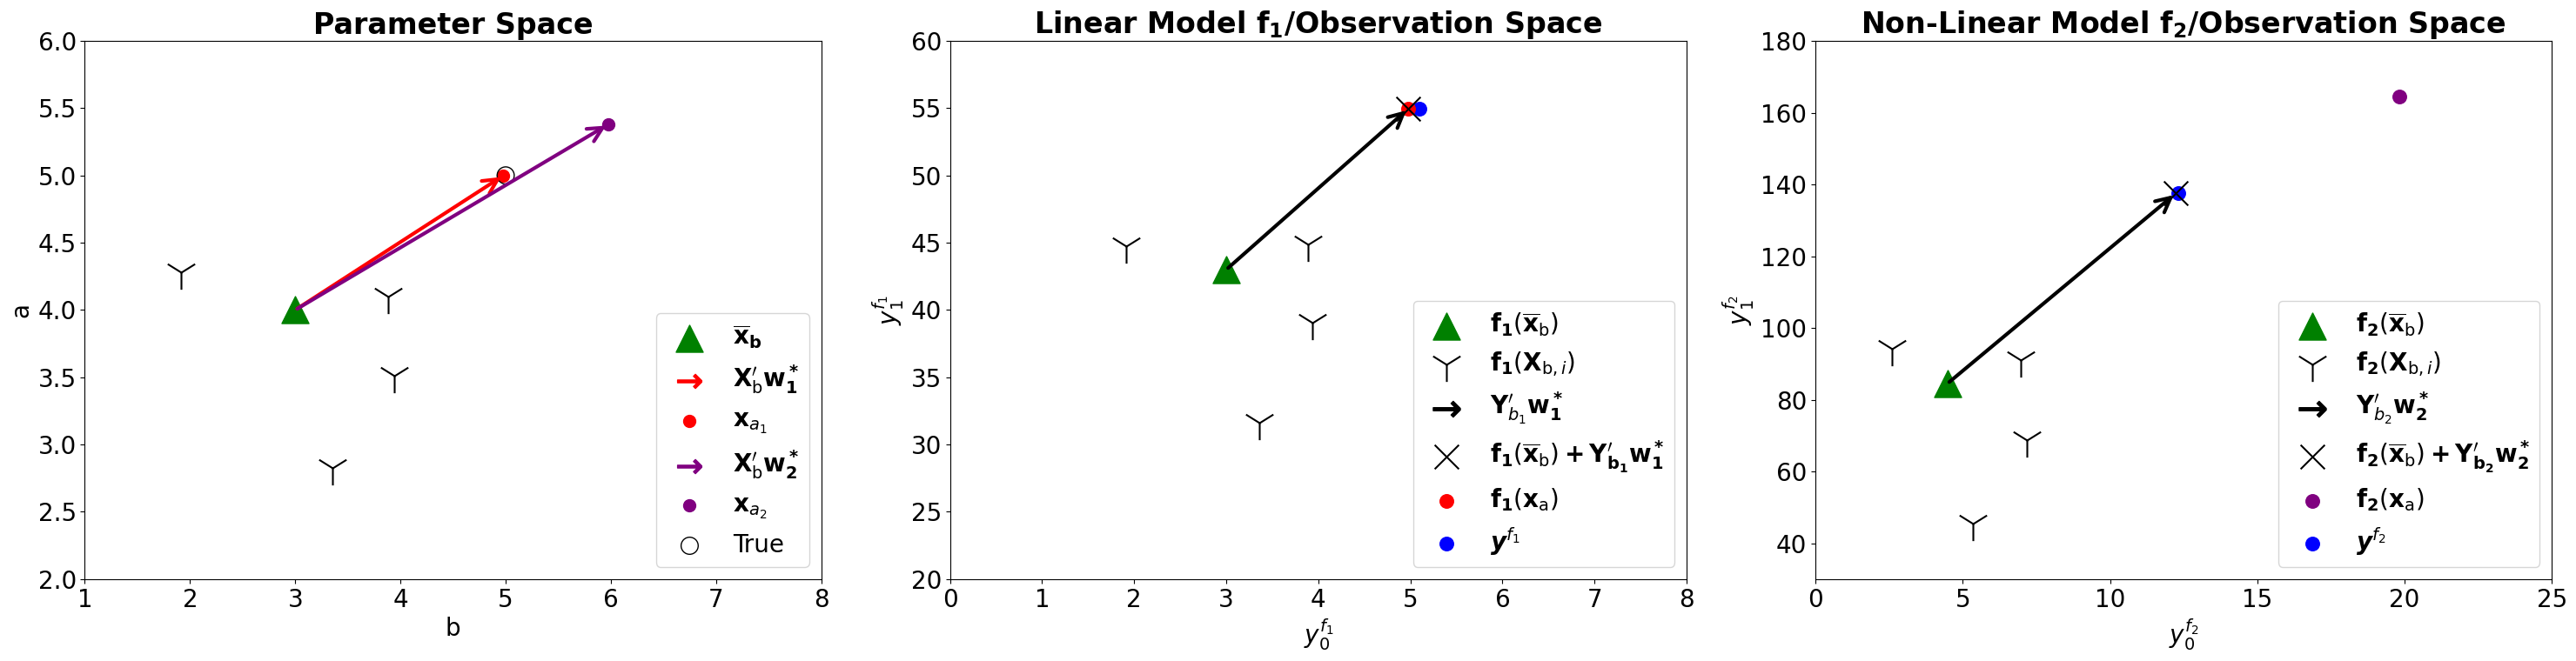

In [46]:

fig, ax, = plt.subplots(nrows=1, ncols=3,sharex=False,figsize=(30,8))
ax=ax.flatten()

######## PARAM ############


pr=ax[0].scatter(x_b[1],x_b[0],c='green',marker=r'^',s=500,label=r'$\overline{\bf x}_{b}$')

po1=ax[0].scatter(x_a_f1[1],x_a_f1[0],color='red',label=r'${\bf x}_{a_1}$',s=100)

po2=ax[0].scatter(x_a_f2[1],x_a_f2[0],color='purple',label=r'${\bf x}_{a_2}$',s=100)

tr=ax[0].scatter( true[1] ,true[0],s=200, label=r"True" ,facecolors='none', edgecolors='black')

ar1=ax[0].scatter( -10 ,-10, c='red',marker=r'$\rightarrow$',s=400, label=r"$\mathbf{X}_{\mathrm{b}}^{\prime}{\bf w^*_1}$" )

ar2=ax[0].scatter( -10 ,-10, c='purple',marker=r'$\rightarrow$',s=400, label=r"$\mathbf{X}_{\mathrm{b}}^{\prime}{\bf w^*_2}$" )

for i in range(n):
    en=ax[0].scatter(Ens_f2.T[i,1],Ens_f2.T[i,0],marker='1',s=800,color='black',label=r'${\bf X}_{b,i}$')

ax[0].annotate("", xytext=(x_b[1], x_b[0]), xy=(x_a_f1[1],x_a_f1[0]),arrowprops=dict(arrowstyle="->",color='red',mutation_scale=30,lw=3))
ax[0].annotate("", xytext=(x_b[1], x_b[0]), xy=(x_a_f2[1],x_a_f2[0]),arrowprops=dict(arrowstyle="->",color='purple',mutation_scale=30,lw=3))

ax[0].set_xlim(1,8)
ax[0].set_ylim(2,6)
ax[0].set_xlabel('b')
ax[0].set_ylabel('a')
ax[0].set_title('Parameter Space',fontweight='bold')
ax[0].legend(handles=[pr,ar1,po1,ar2,po2,tr],loc=4)


######## F1 ############
y=ax[1].scatter(Obs_f1[0],Obs_f1[-1],c='blue',marker=r'.',s=500,label=r'$\boldsymbol{y}^{f_1}$')

pr=ax[1].scatter(f1(x_b)[0],f1(x_b)[-1],c='green',marker=r'^',s=500,label=r'${\bf f_1}\left(\overline{\bf x}_{\mathrm{b}}\right)$')
po=ax[1].scatter(f1(x_a_f1)[0],f1(x_a_f1)[-1],color='red',s=500,marker=r'.',label=r'${\bf f_1}\left({\bf x}_{\mathrm{a}}\right)$')
po_w=ax[1].scatter(f1(x_b)[0]+np.dot(HXb_f1,w_opt_f1)[0],f1(x_b)[-1]+np.dot(HXb_f1,w_opt_f1)[-1],color='black',marker="x",s=400,label=r"${\bf f_1}\left(\overline{\bf x}_{\mathrm{b}}\right)+{\bf Y}_{b_1}'{\bf w^*_1}$")
ar=ax[1].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500,   label=r"${\bf Y}_{b_1}'{\bf w^*_1}$" )

for i in range(n):
    en=ax[1].scatter(HEns_f1.T[i,0],HEns_f1.T[i,-1],marker='1',s=800,color='black',label=r'${\bf f_1}\left({\bf X}_{\mathrm{b},i}\right)$')
ax[1].annotate("", xytext=(f1(x_b)[0], f1(x_b)[1]), xy=(f1(x_b)[0]+np.dot(HXb_f1,w_opt_f1)[0],f1(x_b)[-1]+np.dot(HXb_f1,w_opt_f1)[-1]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))

ax[1].set_ylim(20,60)
ax[1].set_xlim(0,8)

ax[1].set_xlabel(r'$y^{f_1}_{0}$',fontweight='bold')
ax[1].set_ylabel(r'$y^{f_1}_{1}$',fontweight='bold')
ax[1].set_title(r'Linear Model f$_{\bf 1}$/Observation Space',fontweight='bold')
ax[1].legend(handles=[pr,en,ar,po_w,po,y],loc=4)


######## F2 ############
y=ax[2].scatter(Obs_f2[0],Obs_f2[-1],c='blue',marker=r'.',s=500,label=r'$\boldsymbol{y}^{f_2}$')
pr=ax[2].scatter(f2(x_b)[0],f2(x_b)[-1],c='green',marker=r'^',s=500,label=r'${\bf f_2}\left(\overline{\bf x}_{\mathrm{b}}\right)$')
po=ax[2].scatter(f2(x_a_f2)[0],f2(x_a_f2)[-1],color='purple',s=500,marker=r'.',label=r'${\bf f_2}\left({\bf x}_{\mathrm{a}}\right)$')
po_w=ax[2].scatter(f2(x_b)[0]+np.dot(HXb_f2,w_opt_f2)[0],f2(x_b)[-1]+np.dot(HXb_f2,w_opt_f2)[-1],color='black',marker="x",s=400,label=r"${\bf f_2}\left(\overline{\bf x}_{\mathrm{b}}\right)+{\bf Y}_{b_2}'{\bf w^*_2}$")
ar=ax[2].scatter( -10 ,-10, c='black',marker=r'$\rightarrow$',s=500,   label=r"${\bf Y}_{b_2}'{\bf w^*_2}$" )
for i in range(n):
    en=ax[2].scatter(HEns_f2.T[i,0],HEns_f2.T[i,-1],marker='1',s=800,color='black',label=r'${\bf f_2}\left({\bf X}_{\mathrm{b},i}\right)$')
ax[2].annotate("", xytext=(f2(x_b)[0], f2(x_b)[1]), xy=(f2(x_b)[0]+np.dot(HXb_f2,w_opt_f2)[0],f2(x_b)[-1]+np.dot(HXb_f2,w_opt_f2)[-1]),arrowprops=dict(arrowstyle="->", mutation_scale=30,lw=3))

ax[2].set_ylim(30,180)
ax[2].set_xlim(0,25)
ax[2].set_xlabel(r'$y^{f_2}_{0}$',fontweight='bold')
ax[2].set_ylabel(r'$y^{f_2}_{1}$',fontweight='bold')
ax[2].set_title(r'Non-Linear Model f$_{\bf 2}$/Observation Space',fontweight='bold')

ax[2].legend(handles=[pr,en,ar,po_w,po,y],loc=4)

plt.tight_layout()
plt.savefig('Vis3.pdf')
plt.savefig('Vis3.png')